# fbb scheleton notebook for PUI2016 HW6

In [1]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import os
import json
import fiona

import statsmodels.formula.api as smf
import statsmodels.api as sm

s = json.load( open(os.getenv('PUI2016')+'/fbb_matplotlibrc.json') )
pl.rcParams.update(s)
if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\ferna\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
C:\Users\ferna\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
print(os.getenv("PUIDATA")+'MNMapPLUTO.shp')
print(os.getenv("PUIDATA")+'Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv')



C:/Users/ferna/PUI2016LOCAL/PUIdataMNMapPLUTO.shp
C:/Users/ferna/PUI2016LOCAL/PUIdataEnergy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv


In [3]:
#download, and move data to PUIDATA, and read data in 
#nrg = nrg = pd.read_csv("https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv")
nrg = pd.read_csv("https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv")
bsize = gp.read_file(os.getenv("PUIDATA") + '/' + 'MNMapPLUTO.shp')
#t=fiona.open(os.getenv("PUIDATA") + '/' + 'MNMapPLUTO.shp','r')
#gp.read_file?


In [4]:
nrg.columns

Index([u'Record Number', u'NYC Borough, Block, and Lot (BBL)',
       u'Co-reported BBL Status', u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')

In [5]:
bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [6]:
# make sure you clean up your data and throw away columns you do not need!
bsize.drop(['APPBBL',    'APPDate',    'Address', 'AllZoning1',\
       'AllZoning2', 'AreaSource', 'AssessLand',  'AssessTot',
        'BldgFront',      'Block', 'BldgDepth', 'BoroCode', 
        'Borough','BsmtCode',  'BuiltCode',   'BuiltFAR',     
        'CB2010', 'CD',     'CT2010','ComArea',    'CommFAR',
          'CondoNo',    'Council',  'EDesigNum',  'Easements',          
       'ExemptLand',  'ExemptTot',        'Ext',   'FacilFAR',
       'FactryArea',   'FireComp', 'GarageArea', 'HealthArea',    
         'HistDist', 'IrrLotCode',    'LandUse',   'Landmark',
              'Lot',    'LotArea',   'LotDepth',   'LotFront',        
          'LotType',  'LtdHeight', 'MAPPLUTO_F','OtherArea', 
        'Overlay1',      'TaxMap',  'Tract2010', 'OfficeArea',
        'Overlay2',  'OwnerName',  'OwnerType', 'PLUTOMapID',
       'PolicePrct',   'ProxCode',    'ResArea',   'ResidFAR',
       'RetailArea', 'SHAPE_Area', 'SHAPE_Leng',    'SPDist1',
          'SPDist2',    'Sanborn',  'SanitBoro',  'SanitDist',
         'SanitSub', 'SchoolDist',  'SplitZone',  'StrgeArea',         
          'Version',     'XCoord',     'YCoord', 'YearAlter1',           
       'YearAlter2',  'YearBuilt',     'ZMCode', 'BldgClass',
        'ZoneDist1',  'ZoneDist2',  'ZoneDist3',  'ZoneDist4',
          'ZoneMap',   'geometry', 'ZipCode'],axis=1, inplace=True)
bsize.head(3)
#'HealthArea','FactryArea','GarageArea''OfficeArea','LotArea','OtherArea','ResArea', 'RetailArea','StrgeArea'


,BBL,BldgArea,NumBldgs,NumFloors,UnitsRes,UnitsTotal
0,1.015450e+09,10885,1,5.0,16,18
1,1.007238e+09,89203,1,11.0,50,50
2,1.016800e+09,12000,1,5.0,10,10


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000003CAA9C18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000028FAFDD8>]], dtype=object)

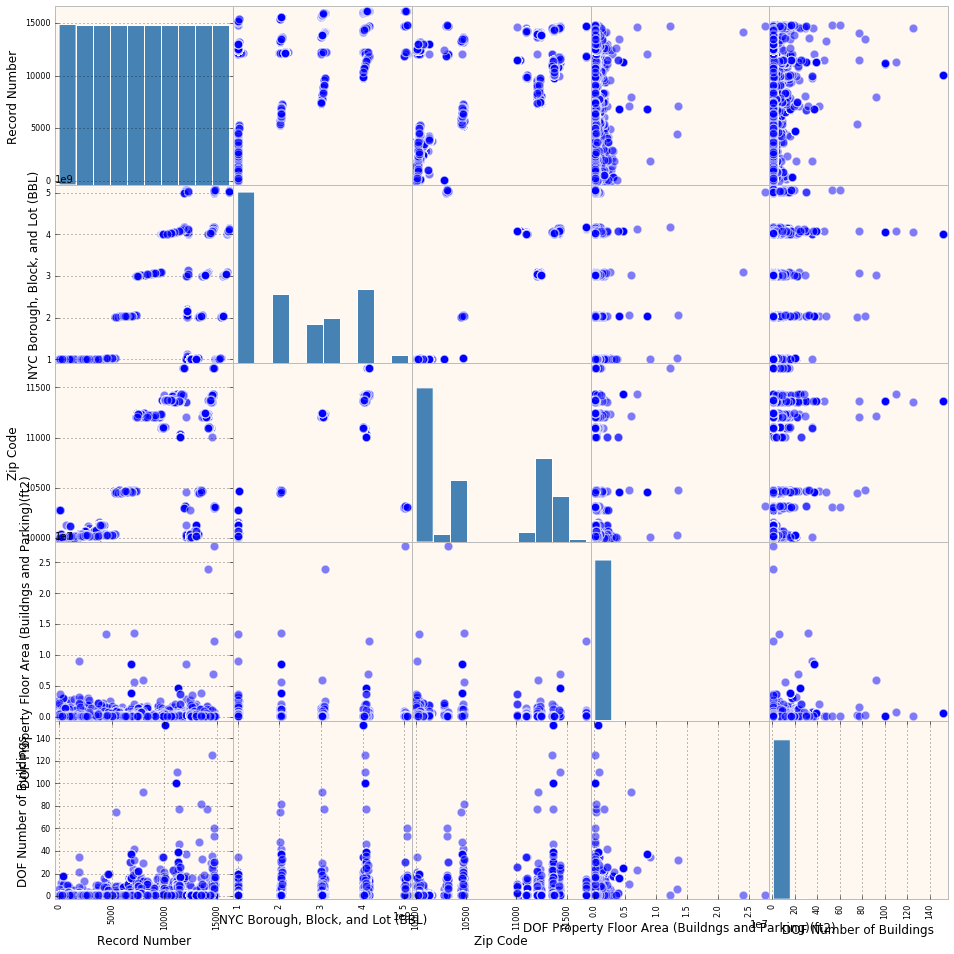

In [7]:
#try make a scatter plot of nrg. Few columns will plot
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16))

In [8]:
nrg.drop(['Record Number','Co-reported BBL Status', 'BBLs Co-reported',\
          'Reported NYC Building Identificaiton Numbers (BINs)',\
          'Street Number','Street Name',\
          'DOF Benchmarking Submission Status',\
          'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',\
          'Weather Normalized Source EUI(kBtu/ft2)',\
          'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',\
          'Automatic Water Benchmarking Eligible', 'Reported Water Method',\
          'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',\
          'Borough',
          'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',\
          'Primary Property Type - Self Selected'], axis = 1 , inplace = True)
nrg.head(3)
#'Borough',

,"NYC Borough, Block, and Lot (BBL)",Zip Code,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),DOF Number of Buildings
0,1.000410e+09,NaN,NaN,918919,NaN,NaN
1,4.021460e+09,11375.0,NaN,NaN,82730.0,1.0
2,2.027620e+09,NaN,NaN,64200,NaN,NaN


Figure 1: scatter matrix of all numerical values in the files.

This kind of plot shows correlations between variables, but it will also show me what can and cannot be plotted trivially in my dataset. Here only a few columns can be plotted: those that contain only numbers (and possibly NaN's), but most columns contain rows that cannot be converted to float (e.g. entries like 'See Primary BBL' in several rows for the energy dataframe 'Site EUI(kBtu/ft2) ' column) , so Pandas refuses to plot them, cause it does not know what to do with those entries. The columns I am interested in are in fact u'Site EUI(kBtu/ft2)' which is a measure of the energy consumed PER SQ FOOT by a building, and then the building area: for eg. u'Reported Property Floor Area (Building(s)) (ft²)'. Neither gets plotted: i need to remove all values that cannot conver to float in order to use the columns and convert them to float arrays and do math with them.
Below I created a function that returns True if what is passed as argument can be converted to a float, and False otherwise. I do it with the Try/Except structure. it is a very useful python functionality that you should look into.
This has to be done entry by entry: if you give it a series you get error "cannot convert the series to..."
However you can pass it a whole array by using it in conjunction with np.vectorize (look up the syntax!) which will implement a for loop for you under the hood to pass the series entry by entry to your function.

In [9]:
# Data Cleanup

# Clean code from Prof Dr Federica

def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False
    

In [10]:
# Select the columns needed from nrg
nrg = nrg[['NYC Borough, Block, and Lot (BBL)', 'Site EUI(kBtu/ft2)', \
           'Reported Property Floor Area (Building(s)) (ft²)']]
nrg.head()

# Cleanup Columns
indx = (np.vectorize(canconvert)(nrg['Site EUI(kBtu/ft2)']))
print ("invalid entries changed to NaN %d"%sum(indx))
nrg['Site EUI(kBtu/ft2)'][~indx] = float('NaN')

indx = (np.vectorize(canconvert)(nrg['Reported Property Floor Area (Building(s)) (ft²)']))
print ("invalid entries changed to NaN %d"%sum(indx))
nrg['Reported Property Floor Area (Building(s)) (ft²)'][~indx] = float('NaN')

nrg.columns
nrg.head()

invalid entries changed to NaN 15513
invalid entries changed to NaN 15430


,"NYC Borough, Block, and Lot (BBL)",Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²)
0,1.000410e+09,NaN,918919
1,4.021460e+09,NaN,NaN
2,2.027620e+09,NaN,64200
3,1.006700e+09,NaN,NaN
4,2.048300e+09,NaN,50000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000028997A90>]], dtype=object)

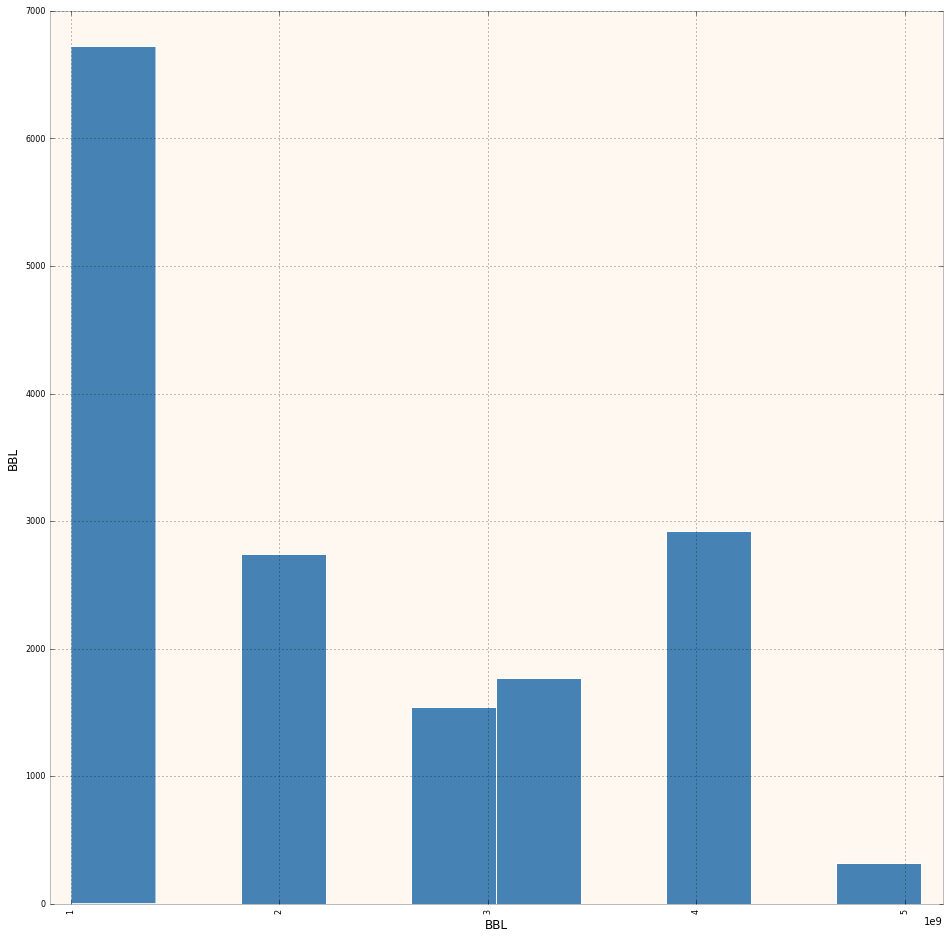

In [11]:
nrg=nrg.rename(columns = {'NYC Borough, Block, and Lot (BBL)':'BBL'})
nrg=nrg.rename(columns = {'Reported Property Floor Area (Building(s)) (ft²)':'Floor Area(ft2)'})
nrg.head(3)
scatter_matrix (nrg, s=300, figsize=(16, 16))

In [12]:
nrg['Floor Area(ft2)'] = nrg['Floor Area(ft2)'] * 1 
nrg['Site EUI(kBtu/ft2)'] = nrg['Site EUI(kBtu/ft2)'] * 1

In [13]:
nrg['Floor Area(ft2)'] = pd.to_numeric(nrg['Floor Area(ft2)'], errors='coerce')
nrg['Site EUI(kBtu/ft2)'] = pd.to_numeric(nrg['Site EUI(kBtu/ft2)'], errors='coerce')

nrg.head(3)

,BBL,Site EUI(kBtu/ft2),Floor Area(ft2)
0,1.000410e+09,NaN,918919.0
1,4.021460e+09,NaN,NaN
2,2.027620e+09,NaN,64200.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000016B260F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001503D208>]], dtype=object)

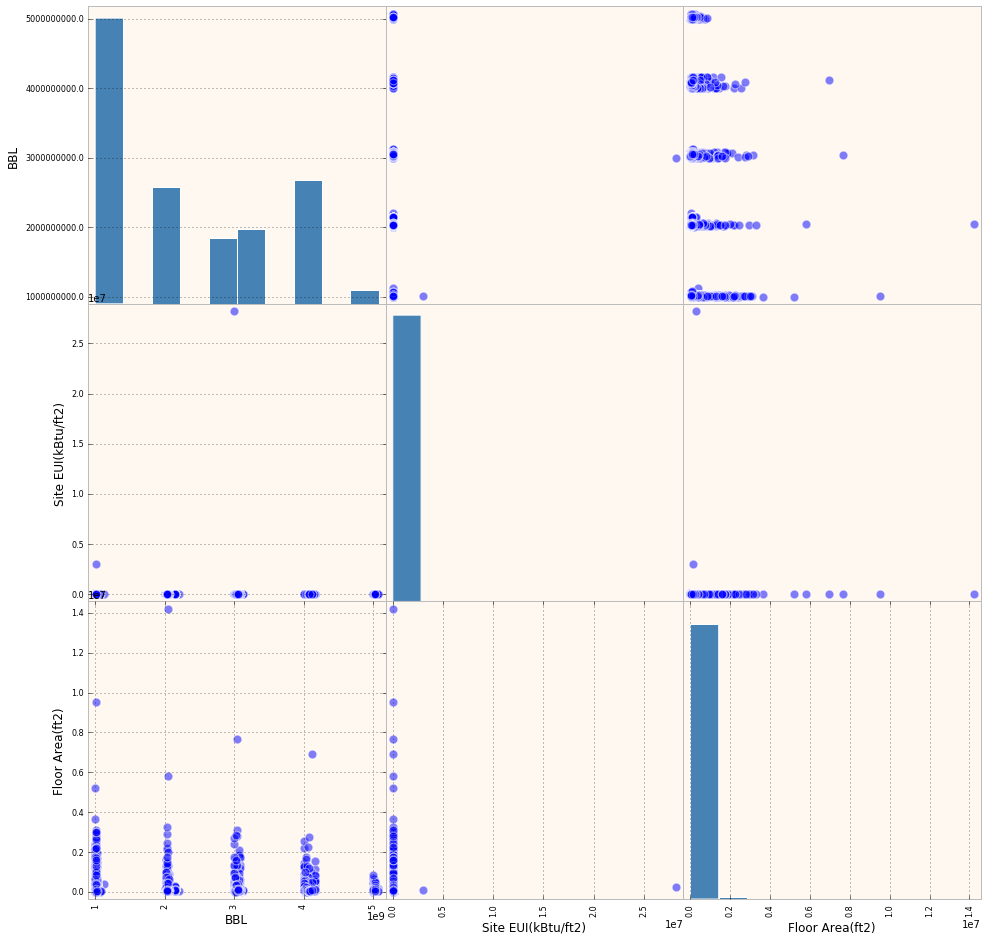

In [14]:
scatter_matrix (nrg, s=300, figsize=(16, 16))

# MERGE THE DATASET
TO DO IT WE NEED A COMMON COLUMN: the building id BBL However the name of this variable (column) in the Energy dataset is 'NYC Borough, Block, and Lot (BBL)'. create a column 'BBL' in the nrg dataset to pass it to the 'on' keyword argument of the merge pandas method: pd.merge(..... on=['BBL']) will use the common column 'BBL' to join the information from the 2 datasets for each BBL value (check out the complete syntax!)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002768FDA0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000388AE630>]], dtype=object)

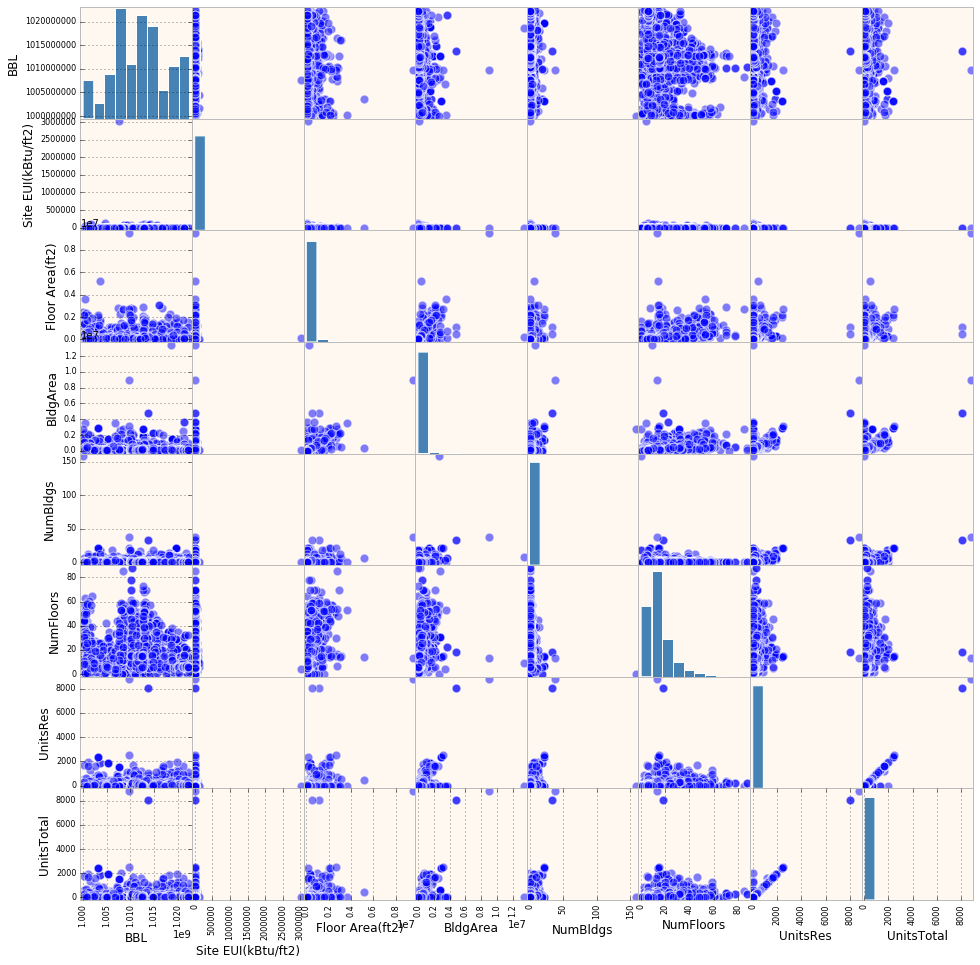

In [15]:
# prepare your BBL columns
#done above
#merge
bblnrgdata = pd.merge(nrg,bsize, on='BBL')

# Now the scatter matrix plot should show more columns.
scatter_matrix (bblnrgdata, s=300, figsize=(16, 16))

In [16]:

bblnrgdata['Energy Total'] = bblnrgdata['Site EUI(kBtu/ft2)'] * bblnrgdata['Floor Area(ft2)']
bblnrgdata.head(5)

,BBL,Site EUI(kBtu/ft2),Floor Area(ft2),BldgArea,NumBldgs,NumFloors,UnitsRes,UnitsTotal,Energy Total
0,1.006700e+09,NaN,NaN,440360,1,2.0,0,1,NaN
1,1.004370e+09,NaN,NaN,52390,1,4.0,0,4,NaN
2,1.013110e+09,125.4,330000.0,313200,1,32.0,0,56,41382000.0
3,1.009220e+09,NaN,NaN,98260,1,19.0,148,148,NaN
4,1.007400e+09,NaN,68329.0,48800,1,5.0,0,1,NaN


#### once you have the dataframe with all the info you want, you want to plot Energy vs Number of Units in the Building. Remember: **Energy TOTAL, not per sq ft...** Here you can choose what you think makes more sense for the number of units: all units, residential units... 

**Make a  scatter plot first of Energy vs Units. It will look really bad be cause all the datapoints are at very low Unit numbers while the Unit number range actually goes up to 8000. **


Make a second plot that zooms into the region where most points are by cutting your x and y axis plotted: e,g, use xlim=(1000,1e10), ylim=(1,1000), where the numbers to be plugged in depend on exactly what you chose to plot

I left my plots below as guidance. **Remember, each plot needs a descriptive caption, and axis labels**

[]

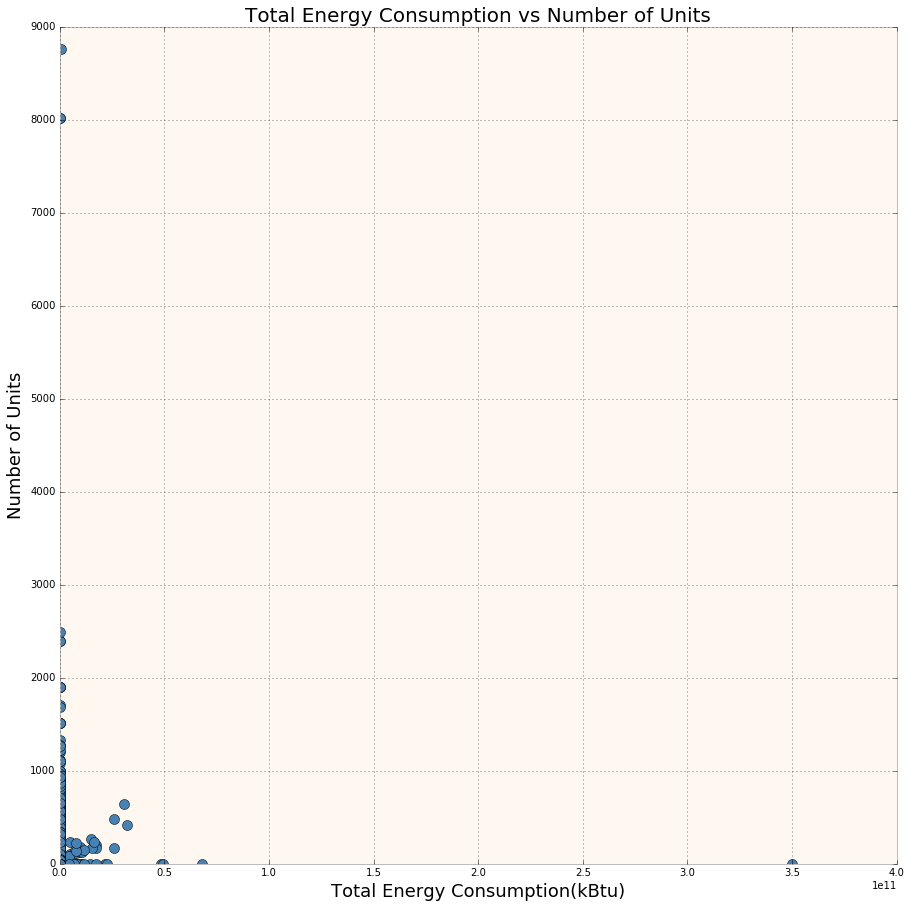

In [17]:
pl.figure(figsize = (15,15))
pl.plot(bblnrgdata['Energy Total'],bblnrgdata['UnitsRes'],'o',ms=10)
pl.title('Total Energy Consumption vs Number of Units', size = 20)
pl.ylabel('Number of Units', size = 18)
pl.xlabel('Total Energy Consumption(kBtu)', size = 18)
pl.plot()

[]

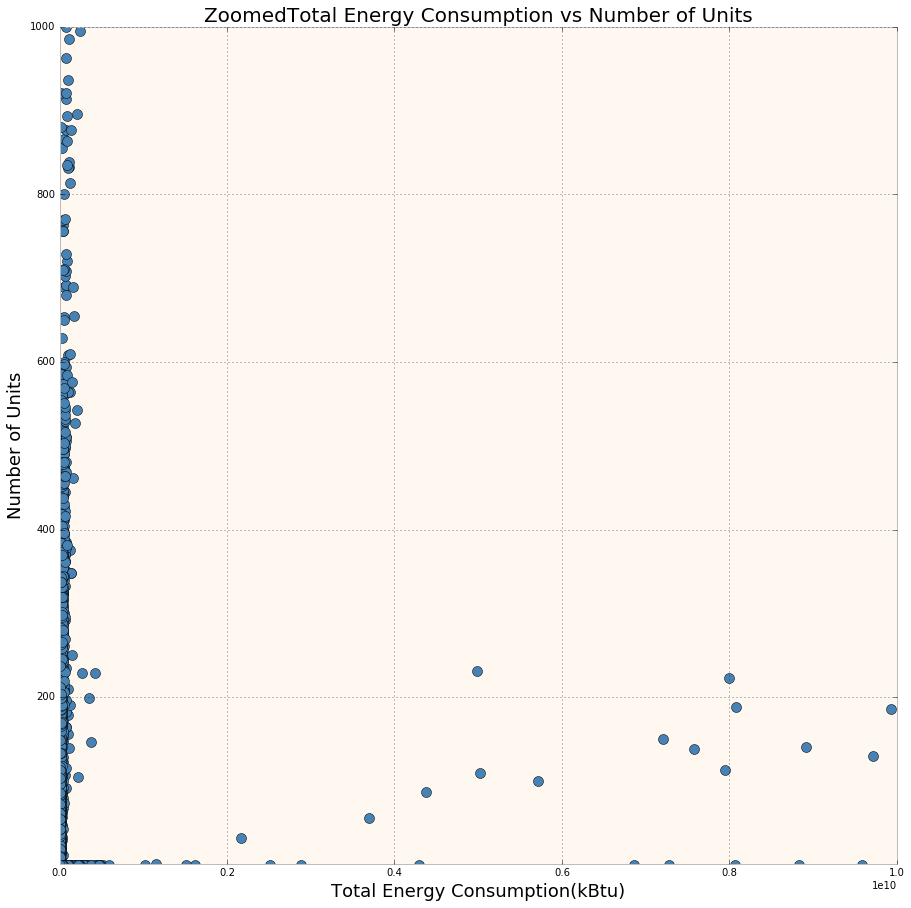

In [18]:
pl.figure(figsize = (15, 15))
#pl.set_xlim = ([1000, 1e10])
#pl.set_ylim = ([1, 1000])
pl.plot(bblnrgdata['Energy Total'], bblnrgdata['UnitsRes'], 'o', ms = 10)

pl.title('ZoomedTotal Energy Consumption vs Number of Units', size = 20)
pl.ylabel('Number of Units', size = 18)
pl.xlabel('Total Energy Consumption(kBtu)', size = 18)
plt.xlim(1000, 1e10)
plt.ylim(1, 1000)
pl.plot()


when the points in a plot all look scrunched against the axis 

**Try to make a log plot instead**. In pandas you enable that with the keyword 'loglog' : bblnrgdata.plot(..... loglog=True)

NOTICE THAT YOU WILL STILL HAVE TO CUT YOUR DATASET! in my data I had a lot of energy datapoints that were exactly 0. I removed these "outliers" which I think are truly outliers in the sense that they are misreported numbers. you can remove the data that have nrg==0 (or nrg < some sensible threshold choice) by indexing your array: something like bblnrgdata_cut = bblnrgdata[bblnrgdata.nrg>1000]

Also I removed the buildings with several thousand units. points like that at the edge of my range would have a lot of "LEVERAGE", however they are not suprious entries like the 0, which i believe are missing values, or perhaps abandoned lots. these are good datapoint that i need to throw away functionally for my analysis to work, but that should be stated clearly.



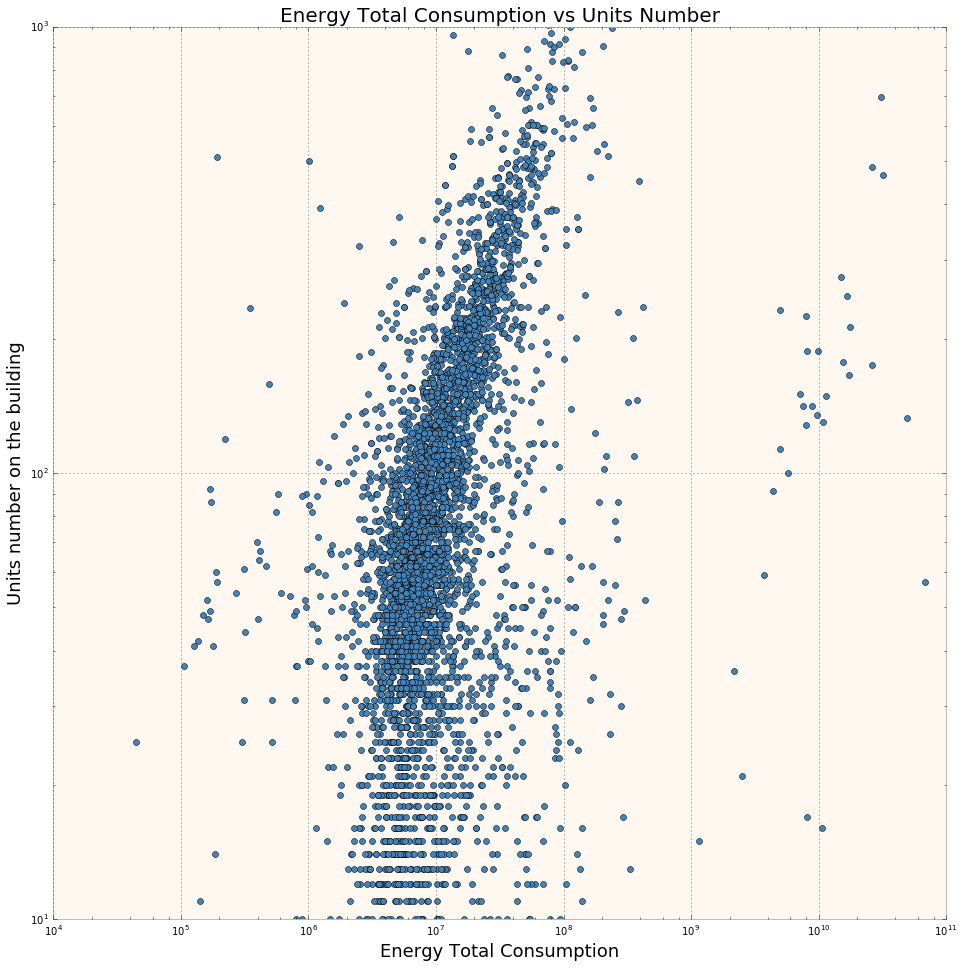

In [19]:
#with the broadcasting below I dont consider the 0 or value of e nergy total below 1000 as well for Units total that are 0
bblclean = bblnrgdata[(bblnrgdata['Energy Total']>=1000) & (bblnrgdata['UnitsTotal']>=3) & (bblnrgdata['UnitsTotal']<=2000)]
bblclean = bblclean.reset_index()
ax = bblclean.plot(x='Energy Total', y='UnitsTotal', style='o', legend=False ,figsize=(16, 16), \
                   xlim=(10000,1e11), ylim=(10,1000),loglog=True)
ax.set_xlabel("Energy Total Consumption", size=18)
ax.set_ylabel("Units number on the building", size=18)
ax.set_title('Energy Total Consumption vs Units Number', size=20)

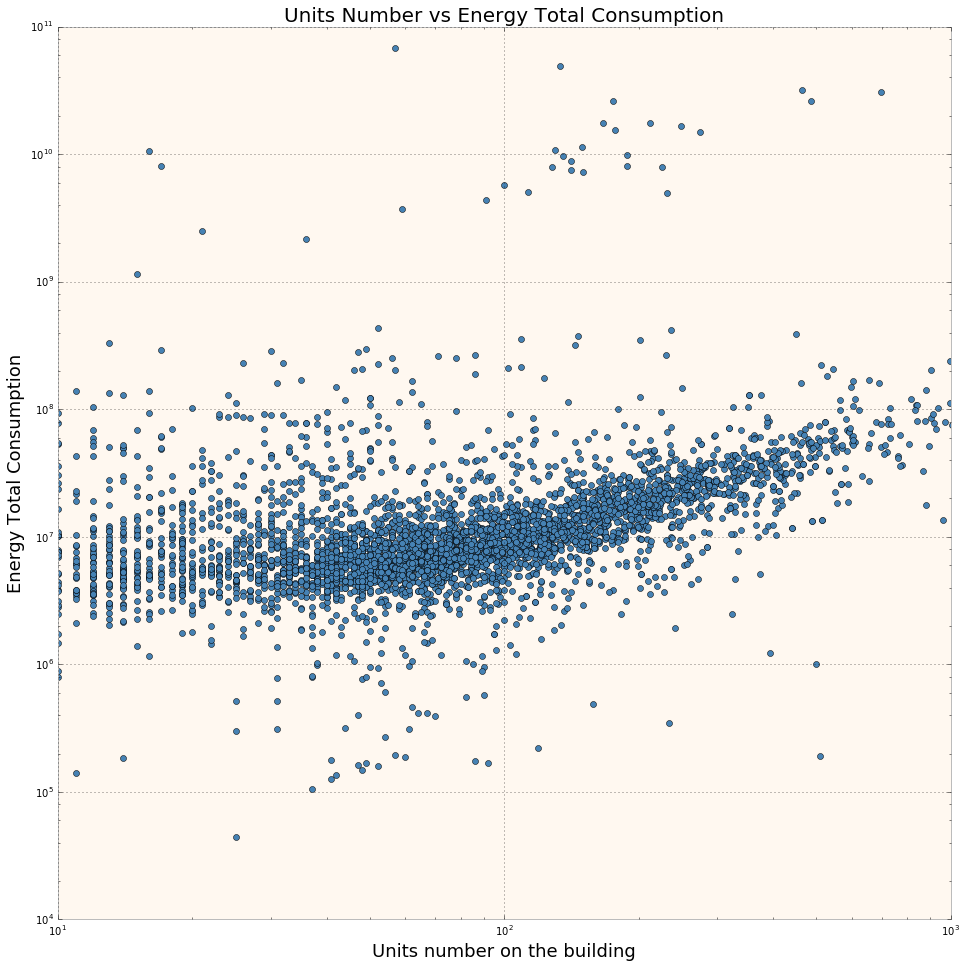

In [20]:
ax2 = bblclean.plot(x='UnitsTotal', y='Energy Total', style='o', legend=False ,figsize=(16, 16), \
                    ylim=(10000,1e11), xlim=(10,1000),loglog=True)
ax2.set_ylabel("Energy Total Consumption", size=18)
ax2.set_xlabel("Units number on the building", size=18)
ax2.set_title('Units Number vs Energy Total Consumption', size=20)

Now fit a line through the data. you can use whatever you want to do it: statsmodels, scipy, any other package, or write your own minimization of the residuals

## BUT REMEMBER: we see hints of a linear relation in log space! so we want to fit a line to the log of our variables, not the variables themselves:
if you used statsmodels it would look something like this:


X = sm.add_constant(np.log10(x))
linmodel = sm.OLS(np.log10(y), X, missing='drop').fit() # ignores entires 
                                                     # where x or y is NaN

## choose wisely which is your DEPENDENT and which is your INDEPENDENT variable. 
both for what you want to do logically (what changes as a functino of what) but also based on which variable has a 'sensible' distribution that allows you to fit a function to it: **you need your independent variable to span a large range, and to be spread somewhat evenly in the range, rather than just clustered in a spot** so in this case switching the independent and dependent variable may be a good idea.



1. **Fit a line** to Units vs Energy.
2. **Fit a line** to Energy vs Units.
3. **Evaluate which is better by calculating the chi square**. I provide a function for that or you can write your own. *Assume poisson statistics for the errors on the independent variable*. 
    The function is 
    
    chisq = $\sum_i \frac{(model(x_i) - data(x_i))^2 }{ error_i^2}$
    
    where the sum is over all datapoints, 
    
    for the i-th value with x value $x_i$ model is the predction of your fit for $x_i$, 
    
    $data(x_i)$ 
    is your observation, 
    
    and $error_i$ is $\sqrt{data(x_i)}$
    (but remember you worked in log space! What are the proper errors??)
    
4. **Fit a 2nd degree polynomial** to the Units vs Energy (with statsmodels.formulae.api.ols() for example passing the formula for a parabola, like we did in class. The formula for a 2nd deg polynomial is 
    $y = ax^2+bx+c$ .

5. **Compare the Units vs Energy line fit and the Units vs Energy 2-nd degree polynomial fit with the Likelihood ratio test**. The formula is:
    
    LR  =  -2 * (logLikelihood_Model1 - logLikelihood_Model2)
    
    where Model1 is the least complex (fewer parameters).
    
    Th logLikelihood can be extracted from the model summary when using statsmodels.
    
    Compare this LR statistics to a chi sq table (for example http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG) and say if *at alpha = 0.05* Model1 is preferible to Model2. The LR is chi^2 distributed with number of degrees of freedom N_{DOF} = parameters_Model2 - parameters_Model1
    
    
    Also if you used statsmodels for the fit you can use the 
    compare_lr_test() method of your fit and verify you got the right answer.  Use the method compare_lr_test() of the most complex model of the 2 and pass it the result of stats models for the simpler fit 
    (e.g. smf.ols(formula = ...).fit().compare_lr_test(sm.OLS(...).fit()))



In [21]:
bblclean.head(3)
bblclean.drop(['BldgArea','NumBldgs','NumFloors','UnitsRes','index'],axis=1,inplace=True)
bblclean.head(3)

,BBL,Site EUI(kBtu/ft2),Floor Area(ft2),UnitsTotal,Energy Total
0,1.013110e+09,125.4,330000.0,56,41382000.0
1,1.007660e+09,122.3,59468.0,8,7272936.4
2,1.008150e+09,117.0,364000.0,24,42588000.0


In [22]:
#modelfit1 is the linear model for Units vs Energy
bblclean['logenergy'] = log10(bblclean['Energy Total'])
bblclean['logunitstotal'] = log10(bblclean['UnitsTotal'])
statsenergy = sm.add_constant(bblclean['logenergy'])
modelfit1 = sm.OLS(log10(bblclean['UnitsTotal']),statsenergy).fit()
modelfit1.params
#statsenergy

const       -0.169742
logenergy    0.283884
dtype: float64

In [23]:

bblclean['UnitsTotalPredict'] =( statsenergy['logenergy'] * modelfit1.params[1] + modelfit1.params[0])

#bblclean.head(3)

bblclean.head(3)

,BBL,Site EUI(kBtu/ft2),Floor Area(ft2),UnitsTotal,Energy Total,logenergy,logunitstotal,UnitsTotalPredict
0,1.013110e+09,125.4,330000.0,56,41382000.0,7.616811,1.748188,1.992551
1,1.007660e+09,122.3,59468.0,8,7272936.4,6.861710,0.903090,1.778190
2,1.008150e+09,117.0,364000.0,24,42588000.0,7.629287,1.380211,1.996093


[]

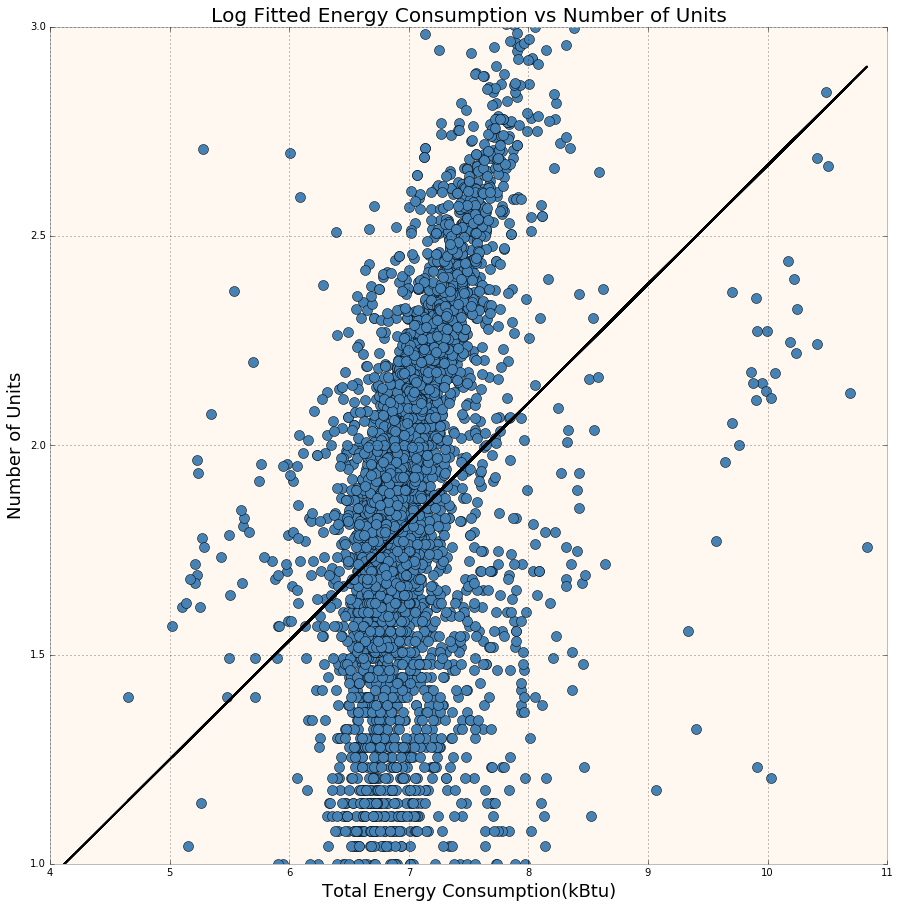

In [24]:
#ax=bblclean.plot(x='logenergy', y='logunitstotal', style='o', legend=False ,figsize=(16, 16), xlim=(log10(10000),log10(1e11)), ylim=(log10(10),log10(1000)))
#ax=bblclean.plot(x='logenergy', y='UnitsTotalPredictPlot',figsize=(16, 16))

pl.figure(figsize = (15, 15))
#pl.set_xlim = ([1000, 1e10])
#pl.set_ylim = ([1, 1000])
pl.plot(bblclean['logenergy'], bblclean['logunitstotal'], 'o', ms = 10)
pl.plot(bblclean['logenergy'], bblclean['UnitsTotalPredict'], color='k')
pl.title('Log Fitted Energy Consumption vs Number of Units', size = 20)
pl.ylabel('Number of Units', size = 18)
pl.xlabel('Total Energy Consumption(kBtu)', size = 18)
plt.xlim(log10(10000), log10(1e11))
plt.ylim(log10(10), log10(1000))
pl.plot()


In [25]:
statsunit = sm.add_constant(bblclean['logunitstotal'])
modelfit2 = sm.OLS(bblclean['logenergy'],statsunit).fit()
modelfit2.params
#statsenergy

const            6.486546
logunitstotal    0.302489
dtype: float64

In [26]:
bblclean['EnergyTotalPredict'] =( statsunit['logunitstotal'] * modelfit2.params[1] + modelfit2.params[0])
# fits and plots here
# your plots should show datapoints (as scatter plot) and models (as lines)

[]

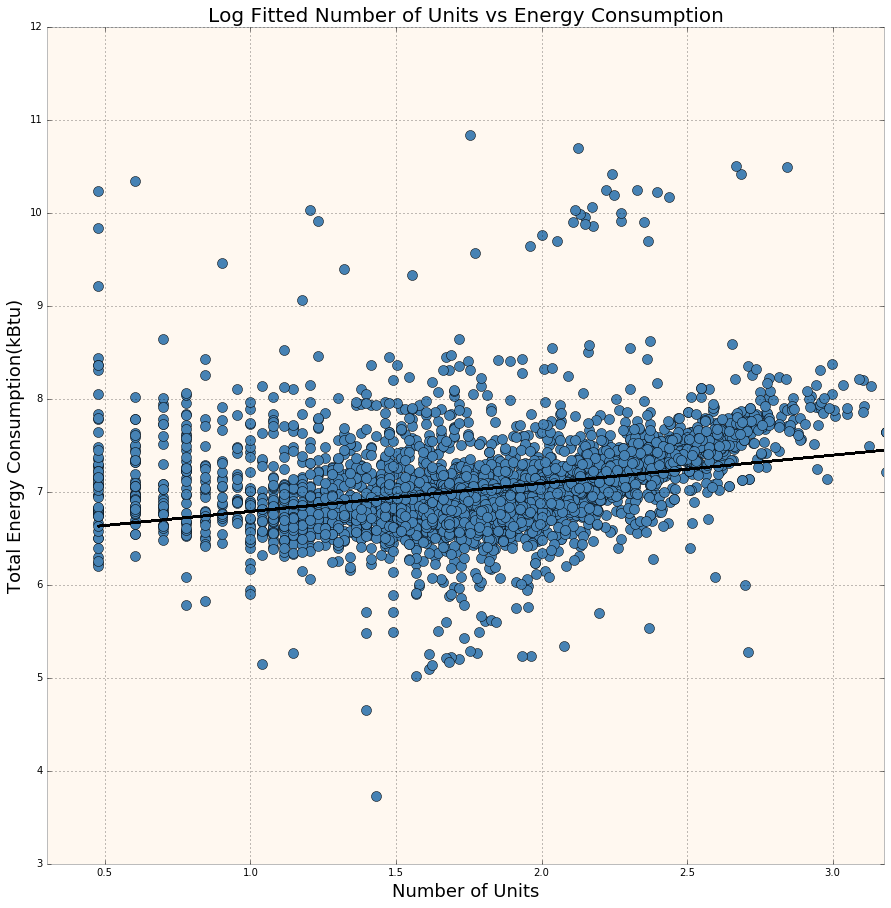

In [27]:
pl.figure(figsize = (15, 15))
#pl.set_xlim = ([1000, 1e10])
#pl.set_ylim = ([1, 1000])
pl.plot(bblclean['logunitstotal'],bblclean['logenergy'], 'o', ms = 10)
pl.plot(bblclean['logunitstotal'], bblclean['EnergyTotalPredict'], color='k')
pl.title('Log Fitted Number of Units vs Energy Consumption', size = 20)
pl.xlabel('Number of Units', size = 18)
pl.ylabel('Total Energy Consumption(kBtu)', size = 18)
plt.ylim(log10(1000), log10(1e12))
plt.xlim(log10(2), log10(1500))
pl.plot()
#ylim=(10000,1e11), xlim=(10,1000)

In [28]:
modelfit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logenergy   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     425.2
Date:                Wed, 19 Oct 2016   Prob (F-statistic):           2.32e-90
Time:                        16:29:15   Log-Likelihood:                -3028.0
No. Observations:                4528   AIC:                             6060.
Df Residuals:                    4526   BIC:                             6073.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             6.4865      0.028    233.913      0.000         6.432     6.541
logunitstotal     0.3025      0.015     20.620      0.000         0.274     0.331
==============================================================================
Omnibus:                     2284.815   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36830.560
Skew:                           2.017   Prob(JB):                         0.00
Kurtosis:                      16.377   Cond. No.                         9.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. **Evaluate which is better by calculating the chi square**. I provide a function for that or you can write your own. *Assume poisson statistics for the errors on the independent variable*. 

chisq = $\sum_i \frac{(model(x_i) - data(x_i))^2 }{ error_i^2}$
    
where the sum is over all datapoints, 
    
for the i-th value with x value $x_i$ model is the predction of your fit for $x_i$, 
    
 $data(x_i)$ 
is your observation, 
    
and $error_i$ is $\sqrt{data(x_i)}$
(but remember you worked in log space! What are the proper errors??)
    

In [29]:
bblclean.head(3)

,BBL,Site EUI(kBtu/ft2),Floor Area(ft2),UnitsTotal,Energy Total,logenergy,logunitstotal,UnitsTotalPredict,EnergyTotalPredict
0,1.013110e+09,125.4,330000.0,56,41382000.0,7.616811,1.748188,1.992551,7.015354
1,1.007660e+09,122.3,59468.0,8,7272936.4,6.861710,0.903090,1.778190,6.759721
2,1.008150e+09,117.0,364000.0,24,42588000.0,7.629287,1.380211,1.996093,6.904045


In [30]:
## Energy Total vs Units Total
residual1 = (bblclean.UnitsTotalPredict - bblclean.logunitstotal)**2
error1 = ((bblclean.logunitstotal))
chisq1 = residual1 / error1
print (chisq1.sum())

893.053826485


In [31]:
## Units Total vs Energy Total 
residual2 = (bblclean.EnergyTotalPredict - bblclean.logenergy)**2
error2 = ((bblclean.logenergy))
chisq2 = residual2 / error2
print (chisq2.sum())

133.103601775


###  2nd degree polynomial to the Units vs Energy
 The formula for a 2nd deg polynomial is  $y = ax^2+bx+c$ .

In [32]:
bblclean['logsquaredunitotal'] = bblclean.logunitstotal**2
bblclean.head(10)

,BBL,Site EUI(kBtu/ft2),Floor Area(ft2),UnitsTotal,Energy Total,logenergy,logunitstotal,UnitsTotalPredict,EnergyTotalPredict,logsquaredunitotal
0,1.013110e+09,125.4,330000.0,56,4.138200e+07,7.616811,1.748188,1.992551,7.015354,3.056161
1,1.007660e+09,122.3,59468.0,8,7.272936e+06,6.861710,0.903090,1.778190,6.759721,0.815572
2,1.008150e+09,117.0,364000.0,24,4.258800e+07,7.629287,1.380211,1.996093,6.904045,1.904983
3,1.005050e+09,82.1,235370.0,24,1.932388e+07,7.286094,1.380211,1.898666,6.904045,1.904983
4,1.021420e+09,137.7,64806.0,62,8.923786e+06,6.950549,1.792392,1.803410,7.028725,3.212668
5,1.021750e+09,103.2,62839.0,85,6.484985e+06,6.811909,1.929419,1.764052,7.070174,3.722657
6,1.003360e+09,74.0,98000.0,128,7.252000e+06,6.860458,2.107210,1.777834,7.123954,4.440334
7,1.008070e+09,130.0,204417.0,10,2.657421e+07,7.424460,1.000000,1.937946,6.789035,1.000000
8,1.008580e+09,138.3,60110.0,61,8.313213e+06,6.919769,1.785330,1.794672,7.026589,3.187403
9,1.009688e+09,56909.0,457946.0,486,2.606125e+10,10.415995,2.686636,2.787196,7.299224,7.218014


In [34]:
curvemodel = smf.ols(formula='logenergy ~ logunitstotal + logsquaredunitotal', data = bblclean).fit()

In [35]:
curvemodel.params

Intercept             7.821746
logunitstotal        -1.354289
logsquaredunitotal    0.474248
dtype: float64

In [36]:
#bblclean['energypredict2d']=curvemodel.params[0]+curvemodel.params[1]*bblclean.logunitstotal+bblclean.logsquaredunitotal*curvemodel.params[2]
bblclean['energypredict2d']=curvemodel.predict(bblclean)
bblclean.head(10)
x = linspace(0,3.5,100)

[]

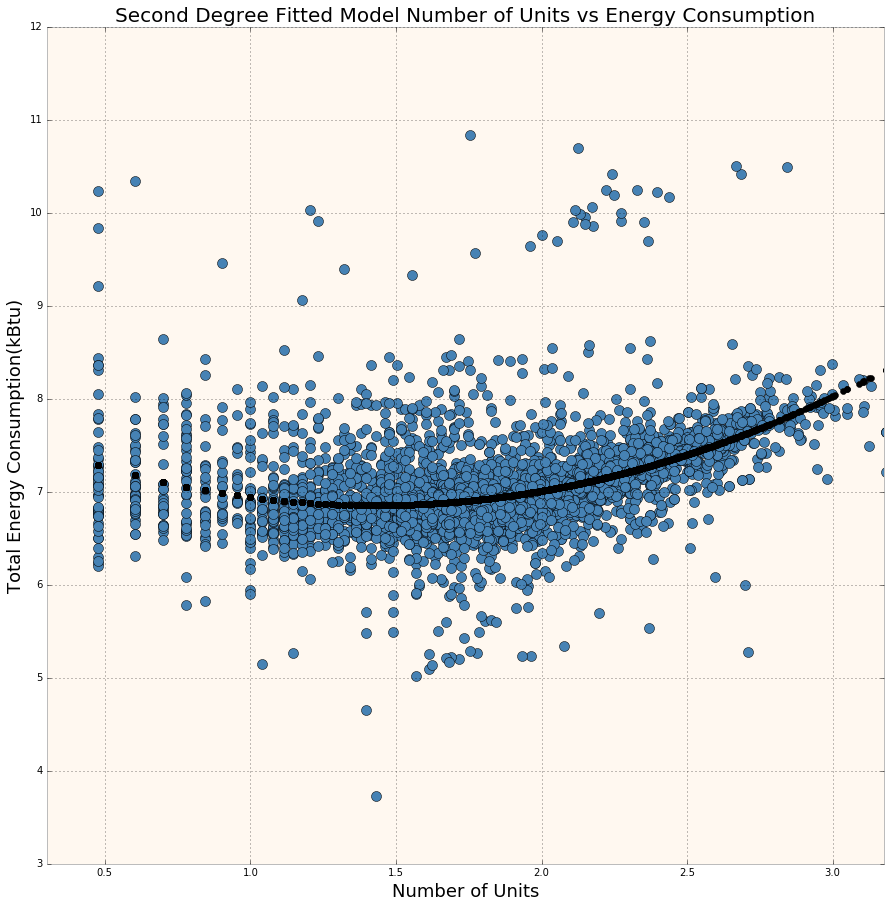

In [37]:
pl.figure(figsize = (15, 15))

pl.plot(bblclean['logunitstotal'],bblclean['logenergy'], 'o', ms = 10)
pl.plot(bblclean['logunitstotal'], curvemodel.predict(bblclean),'o', color='k')
pl.title('Second Degree Fitted Model Number of Units vs Energy Consumption', size = 20)
pl.xlabel('Number of Units', size = 18)
pl.ylabel('Total Energy Consumption(kBtu)', size = 18)
plt.ylim(log10(1000), log10(1e12))
plt.xlim(log10(2), log10(1500))
pl.plot()

5. **Compare the Units vs Energy line fit and the Units vs Energy 2-nd degree polynomial fit with the Likelihood ratio test**. The formula is:
    
    LR  =  -2 * (logLikelihood_Model1 - logLikelihood_Model2)
    
    where Model1 is the least complex (fewer parameters).
    
    Th logLikelihood can be extracted from the model summary when using statsmodels.
    
    Compare this LR statistics to a chi sq table (for example http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG) and say if *at alpha = 0.05* Model1 is preferible to Model2. The LR is chi^2 distributed with number of degrees of freedom N_{DOF} = parameters_Model2 - parameters_Model1
    
    
    Also if you used statsmodels for the fit you can use the 
    compare_lr_test() method of your fit and verify you got the right answer.  Use the method compare_lr_test() of the most complex model of the 2 and pass it the result of stats models for the simpler fit 
    (e.g. smf.ols(formula = ...).fit().compare_lr_test(sm.OLS(...).fit()))

In [38]:
print ("LR : ", -2 * (-modelfit2 .llf - (-curvemodel.llf)))
print ("LR from statsmodels:", curvemodel.compare_lr_test(modelfit2 ))
#curvemodel.compare_lr_test?

LR :  -597.346612711
LR from statsmodels: (597.34661271093773, 6.3231574404368072e-132, 1.0)


#### The returnED CHIsqr is big (597.346) and the p-value is small, the Degrees of freedrom = 1
#### This tell us that increasing the 2nd degree polinomial is justified


## Extra credit 1: calculate and plot the likelihood surface
Create a function that minimizes the residuals:

the residuals are the sum of the differences between data and model: in the case of a line fit model. Use the same function you created for the chi^2 test.

You should sum over each datapoints the residuals squared, which should look something like

(np.log(bblnrgdatacut.nrg) - np.log(bblnrgdatacut.UnitsTotal)*a+b )^2 / errors^2

where a and b are the parameters returned by the line fitter. 

For each data point you can calculate the model at different values : for example in a range B = np.arange (-100, 100, 1) for the intercept, and A = np.arange(-50.0, 50.0, 0.5) for the slope.


You can write it as a nested for loop (or challenge yourself and vectorize it!) with a loop inside another ranging all poissible combinations of the 2 variables (i use enumerate to get both an index from 0 to the size of my array, which i assign to i (and j) and the value of the array at that index - look up the syntax!):


Lsurface = np.zeros((len(A), len(B)))
for i,a in enumerate(A):
    for j,b in enumerate(B):
         Lsurface[i][j] = np.nansum(residuals(a,b,data,errors)) .....

this gives you a 2D array that represents your likelihood surface! What we do to find a good fit is find the minimum (lowest point) on this surface.
You can plot a surface (a 2D array) with pl.imshow(Lsurface) as a "heatmap" but when you do that you will find that the plot is very uninformative. just like you did before with the data, plot the log of it (pl.imshow(np.log(Lsurface)). Also make sure your x and y axes tick numbers represent the range of values, not the cell index, which is the default for imshow. Inputting your data in the cell below should give a plot similar to mine

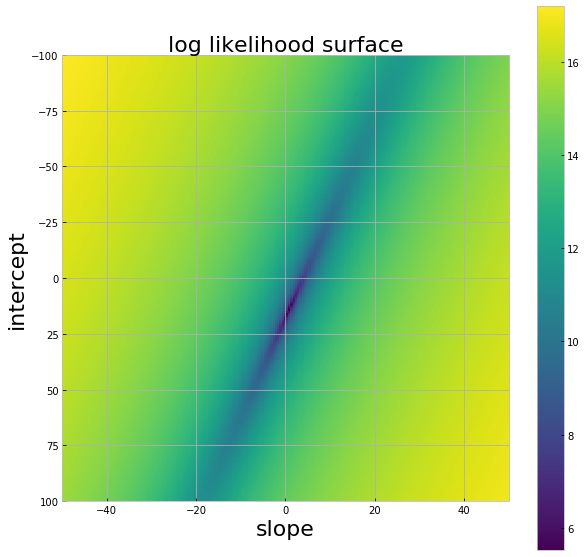

In [42]:
pl.figure(figsize=(10,10))
pl.title ("log likelihood surface", fontsize = 22)
pl.imshow(np.log(Lsurface), extent = [-50,50,100,-100], aspect=0.5)
pl.xlabel('slope', fontsize = 22)
pl.ylabel('intercept', fontsize = 22)
pl.colorbar()

## EXTRA CREDIT: get creative with the dataset. can you make an insigntful plot to show any structure in the data?

below I am mapping the building age to a colormap and the ratio of total to residential units to the size of the datapoint.

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Text(0.5,0,'total energy consumption (kBtu)')

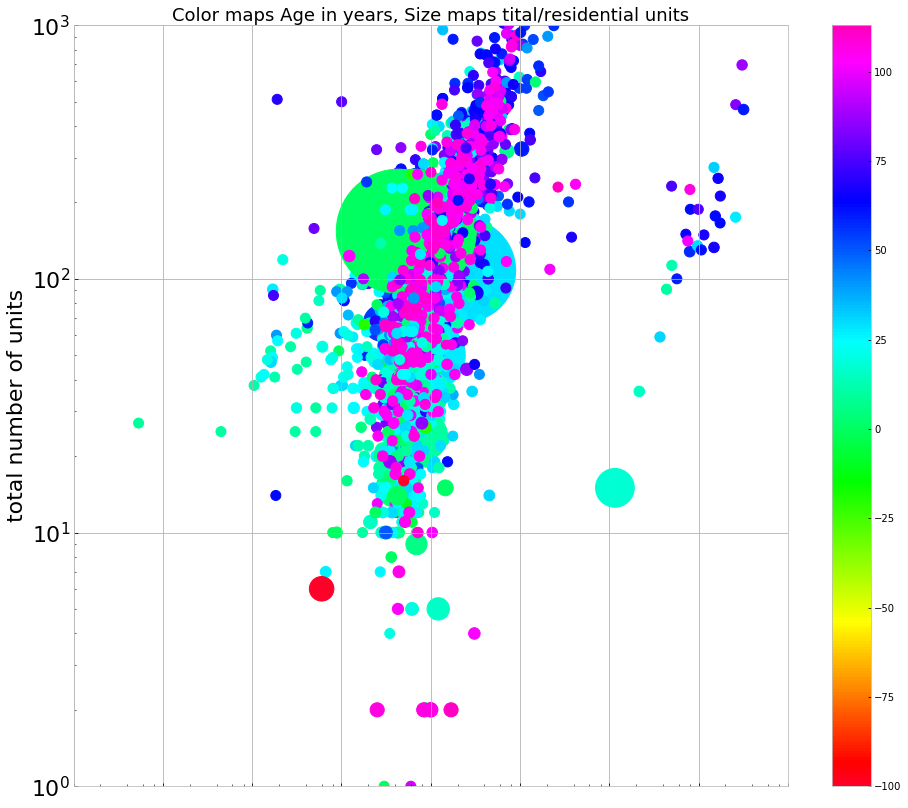

In [49]:
bblnrgdata['YearBuilt'][bblnrgdata['YearBuilt']<1800]=1800

bblnrgdata.plot(kind='scatter',x='nrg',y='UnitsTotal', 
                fontsize=22, colormap='gist_rainbow', alpha = 1, 
                marker='o',  figsize=(16, 14), loglog=True,  
                xlim=(1000,1e11), ylim=(1,1000), 
                c=bblnrgdata['YearBuilt']-1900, 
                s=bblnrgdata['UnitsTotal']/bblnrgdata['UnitsRes']*100)
pl.title('Color maps Age in years, Size maps tital/residential units', fontsize=18)
pl.ylabel("total number of units", fontsize=22)
pl.xlabel("total energy consumption (kBtu)", fontsize=22)